In [1]:
from saba import SherpaFitter
from astropy.modeling.models import Gaussian1D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(context='notebook', 
        style='whitegrid', 
        palette='dark',
        font_scale=1.5,
        color_codes=True)


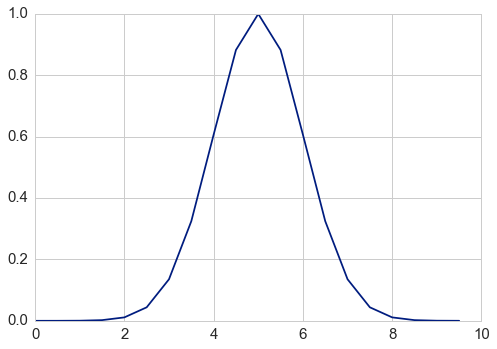

In [27]:
dx = 0.5
x = np.arange(0.0, 10.0, dx)
y = Gaussian1D(1.0, 5.0, 1.0)(x)
e = 1e-6*np.ones_like(x)
binsize = dx*np.ones_like(x)
fig, ax = plt.subplots(1, 1)
ax.plot(x, y)

<Gaussian1D(amplitude=1.0000000000000058, mean=4.75, stddev=1.0, name='')>

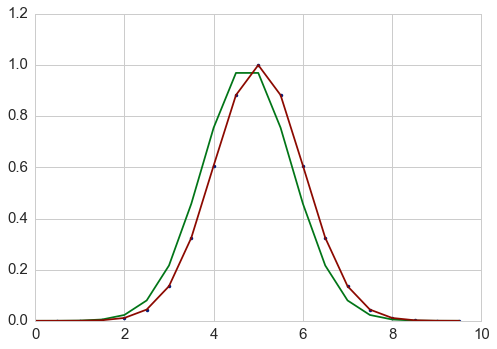

In [30]:
sfit = SherpaFitter(statistic='chi2', optimizer='levmar', estmethod='confidence')
init_model = Gaussian1D(2.0, 1.0, 2.0)
model = sfit(init_model, x, y, err=e, xbinsize=binsize)
fig, ax = plt.subplots(1, 1)
ax.plot(x, y, '.')
ax.plot(x, model(x))
ax.plot(x, model(x - dx/2))
model


Definitely doesn't work when `xbinsize` is set.  This seems to be a problem with the `sherpa.data.Data1DInt` class.  It seems to return the model evaluated at the left cell edges instead of the cell centers.

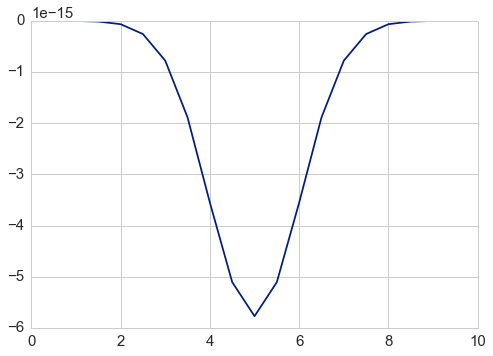

In [29]:
fig, ax = plt.subplots(1, 1)
ax.plot(x, y - model(x - dx/2))

In [12]:
from sherpa.data import Data1D, Data1DInt, Data2D, Data2DInt, DataSimulFit

In [16]:
Data1DInt??

In [17]:
Data1D??